# Loading the dataset

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:\Users\Admin\Downloads\ass1\Project2\survey_results_public.csv')

In [124]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [125]:
df.columns
# df['ConvertedCompYearly']

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

#Data Cleaning And Modeling

In [126]:
df=df[['Country','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]
df.rename({'ConvertedCompYearly':'Salary'},axis=1,inplace=True)

In [127]:
df.isnull().sum()

Country          1497
EdLevel          1697
YearsCodePro    21435
Employment       1559
Salary          35197
dtype: int64

In [128]:
df=df[df['Salary'].notnull()]
df.isnull().sum()

Country           0
EdLevel          17
YearsCodePro    136
Employment        4
Salary            0
dtype: int64

In [129]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [130]:
df=df.dropna()
df.isna().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [131]:
df['Employment'].value_counts()

Employed, full-time                                                                             31382
Independent contractor, freelancer, or self-employed                                             2739
Employed, full-time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                               632
Independent contractor, freelancer, or self-employed;Employed, part-time                          207
Employed, full-time;Employed, part-time                                                           151
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
I prefer not to say                                                                                27
Retired                                                                                            18
Employed, part-time;Retired                                                       

In [132]:
df=df[df['Employment']=='Employed, full-time']
df=df.drop(['Employment'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [133]:
df['Country'].value_counts()

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [134]:
def shorten_cat(category,cutoff):
  category_sorted={}
  for i in range(len(category)):
    if category.values[i]>=cutoff:
      category_sorted[category.index[i]]=category.index[i]
    else:
      category_sorted[category.index[i]]='Other'
  return category_sorted    




In [135]:
country_map=shorten_cat(df.Country.value_counts(),450)
country_map
df['Country']=df['Country'].map(country_map)
df['Country'].value_counts()

Other                                                   9484
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Name: Country, dtype: int64

# Outlier removal

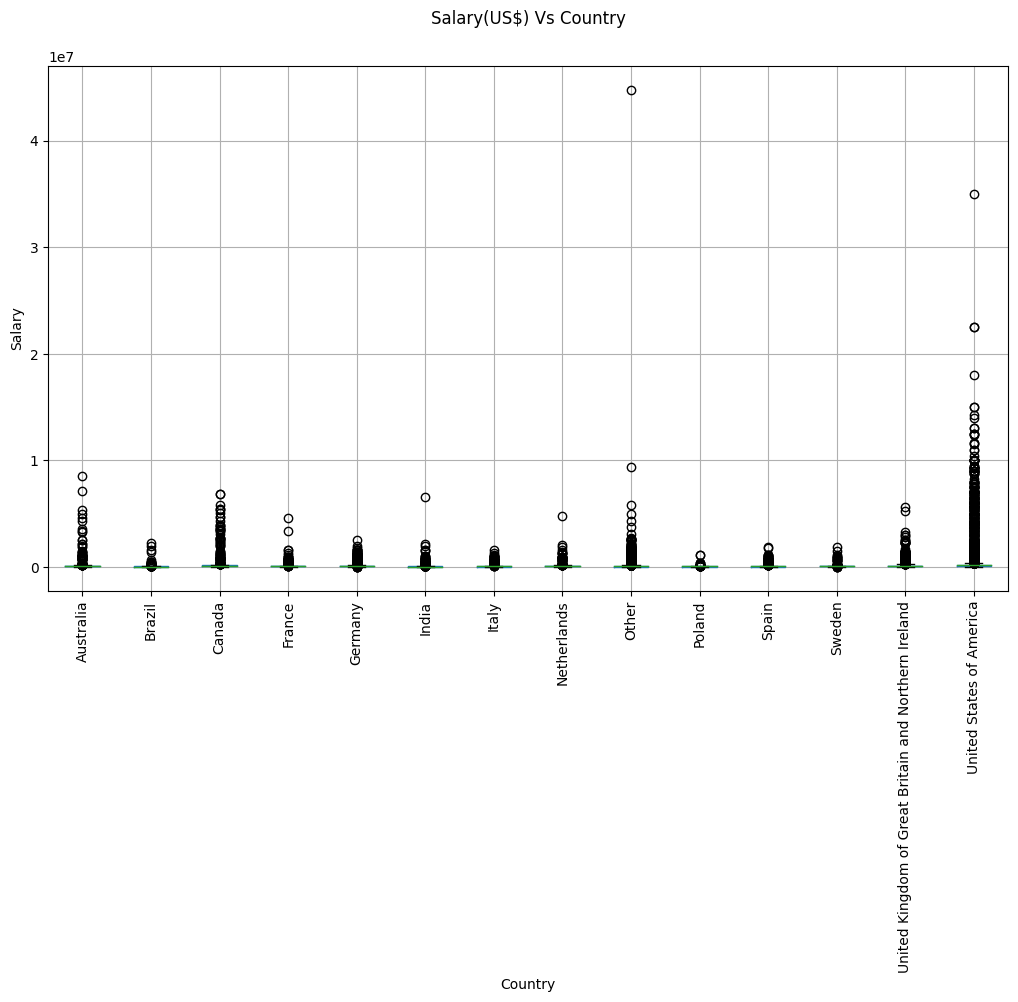

In [136]:
fig, ax=plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country',ax=ax)
plt.suptitle('Salary(US$) Vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [137]:
df=df[df['Salary']<=250000]
df=df[df['Salary']>=10000]
df=df[df['Country']!='Other']


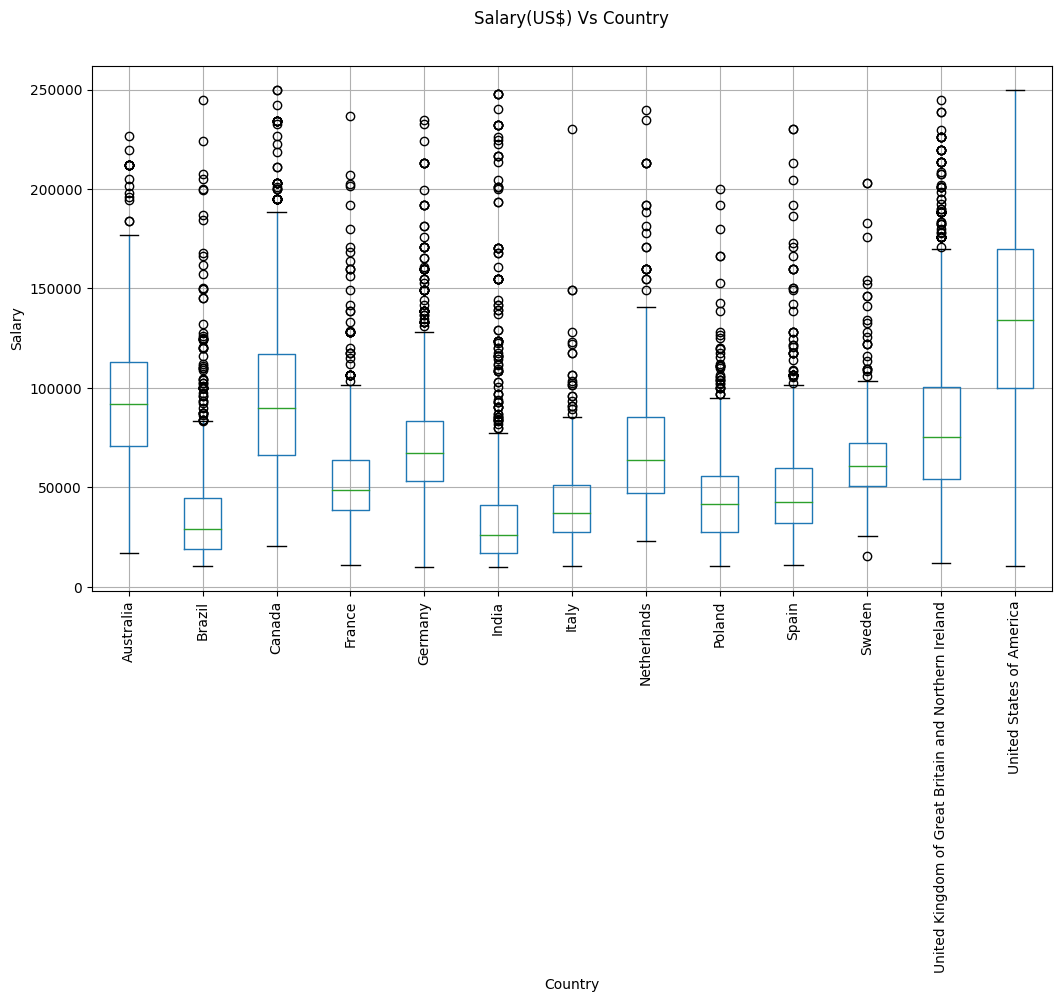

In [138]:
fig, ax=plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country',ax=ax)
plt.suptitle('Salary(US$) Vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [139]:
df['YearsCodePro'].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [140]:
def Converter(x):
  if x=='More than 50 years':
    return 50
  if x=='Less than 1 year':
    return 0.5
  return float(x)  

In [141]:
df['YearsCodePro']=df['YearsCodePro'].apply(Converter)
df['YearsCodePro']

2         5.0
8         6.0
10        2.0
12        5.0
21        4.0
         ... 
73113     5.0
73116    16.0
73119     1.0
73120     2.0
73121     3.0
Name: YearsCodePro, Length: 19127, dtype: float64

In [142]:
df.dtypes

Country          object
EdLevel          object
YearsCodePro    float64
Salary          float64
dtype: object

In [143]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [144]:
def education_cleaned(y):
  if 'Bachelor' in y:
    return 'Bachelors degree'
  if 'Master' in y:
    return 'Masters degree'
  if 'Professional degree' in y or 'Other doctoral degree' in y:
    return 'Post Graduation'
  return 'Less than bachelors'
df['EdLevel']=df['EdLevel'].apply(education_cleaned)
df['EdLevel'].value_counts()

Bachelors degree       9276
Masters degree         5011
Less than bachelors    3812
Post Graduation        1028
Name: EdLevel, dtype: int64

# Converting the features with object into numerical value

In [145]:
# Using LabelEncoder we are coverting the object datatype into integer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.dtypes

Country          object
EdLevel          object
YearsCodePro    float64
Salary          float64
dtype: object

In [146]:
df['Country']=le.fit_transform(df['Country'])
df['EdLevel']=le.fit_transform(df['EdLevel'])
df.dtypes
df = df.reset_index(drop=True)

In [147]:
X=df.iloc[:,:-1]
X

,Country,EdLevel,YearsCodePro
0,11,2,5.0
1,7,2,6.0
2,11,0,2.0
3,12,0,5.0
4,6,2,4.0
...,...,...,...
19122,12,2,5.0
19123,12,0,16.0
19124,12,0,1.0
19125,9,0,2.0


In [148]:
y=df.iloc[:,-1]
y

0         40205.0
1         49056.0
2         60307.0
3         65000.0
4         34126.0
           ...   
19122     94000.0
19123    115000.0
19124     70000.0
19125     35192.0
19126     75384.0
Name: Salary, Length: 19127, dtype: float64

In [149]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [150]:
y_pred=reg.predict(X)

In [151]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error=np.sqrt(mean_squared_error(y, y_pred))

In [152]:
error

45306.974685888454

In [153]:
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor(random_state=0)
dec_reg.fit(X,y)
y_pred_tree=dec_reg.predict(X)
error_tree=np.sqrt(mean_squared_error(y, y_pred_tree))
error_tree

33869.43111520485

In [154]:
from sklearn.ensemble import RandomForestRegressor
ran_reg=RandomForestRegressor(random_state=42)
ran_reg.fit(X,y)
y_pred_forest=ran_reg.predict(X)
error_forest=np.sqrt(mean_squared_error(y, y_pred_forest))
error_forest

33946.12038789771

In [159]:
accuracy=[error,error_forest,error_tree]
accuracy

[45306.974685888454, 33946.12038789771, 33869.43111520485]

In [164]:
df_comp=pd.DataFrame({'Model':['Linear Regressor','DecisionTree','Randomforest'],'error':accuracy})
df_comp

,Model,error
0,Linear Regressor,45306.974686
1,DecisionTree,33946.120388
2,Randomforest,33869.431115
